In [108]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

path = kagglehub.dataset_download("ayeshasiddiqa123/salary-data")

print("Path to dataset files:", path)

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_path = os.path.join(path, csv_files[0])

df = pd.read_csv(csv_path)

Using Colab cache for faster access to the 'salary-data' dataset.
Path to dataset files: /kaggle/input/salary-data


In [109]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [111]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [112]:
for col in ['Age', 'Years of Experience', 'Salary']:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())

for col in ['Gender', 'Education Level', 'Job Title']:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

In [113]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [114]:
for col in df.columns:
    if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col])or isinstance(df[col].dtype, pd.CategoricalDtype):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

/tmp/ipython-input-3433845684.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col])or isinstance(df[col].dtype, pd.CategoricalDtype):
/tmp/ipython-input-3433845684.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col])or isinstance(df[col].dtype, pd.CategoricalDtype):


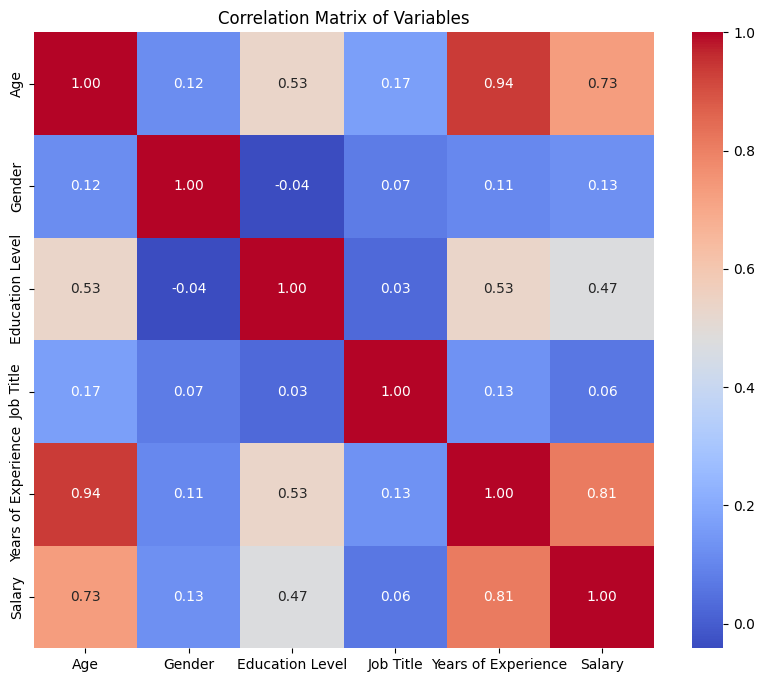

In [115]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

In [116]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

In [119]:
print("\n--- Linear Regression Model Evaluation ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

print("\n--- Decision Tree Model Evaluation ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_dt):.2f}")


--- Linear Regression Model Evaluation ---
MAE: 23736.65
MSE: 892668414.69
R2 Score: 0.67

--- Decision Tree Model Evaluation ---
MAE: 3116.94
MSE: 93817976.26
R2 Score: 0.96


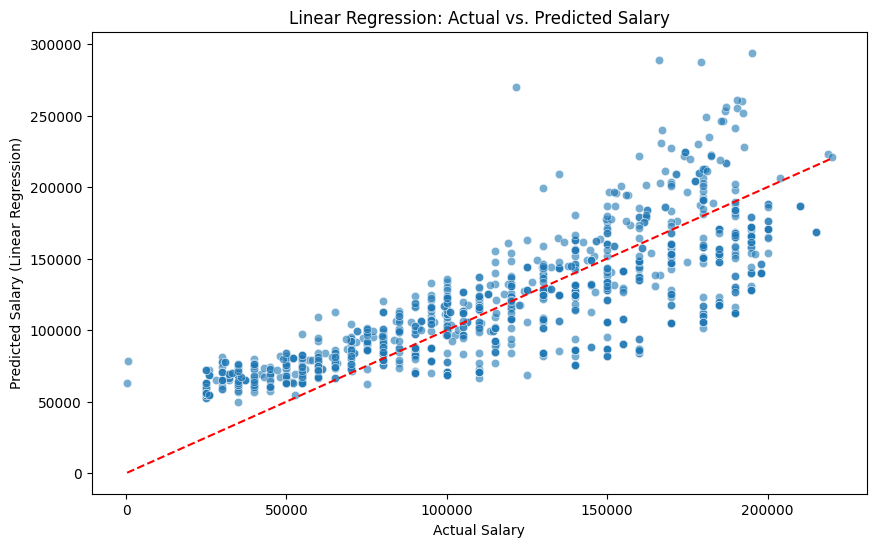

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (Linear Regression)')
plt.title('Linear Regression: Actual vs. Predicted Salary')
plt.show()

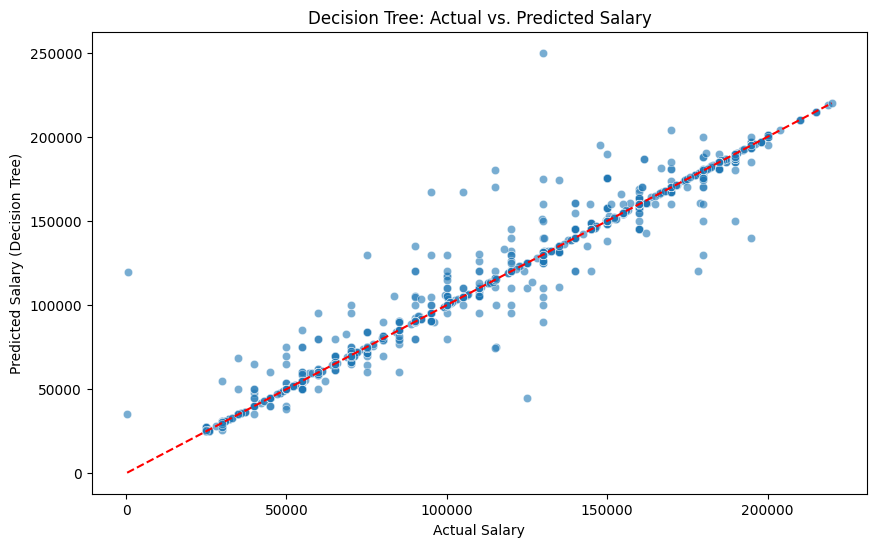

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (Decision Tree)')
plt.title('Decision Tree: Actual vs. Predicted Salary')
plt.show()

In [122]:
metrics_data = {
    'Model': ['Linear Regression', 'Decision Tree'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt)
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

               Model           MAE           MSE  R2 Score
0  Linear Regression  23736.652680  8.926684e+08  0.665754
1      Decision Tree   3116.941385  9.381798e+07  0.964871


/tmp/ipython-input-2913879325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
/tmp/ipython-input-2913879325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
/tmp/ipython-input-2913879325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')


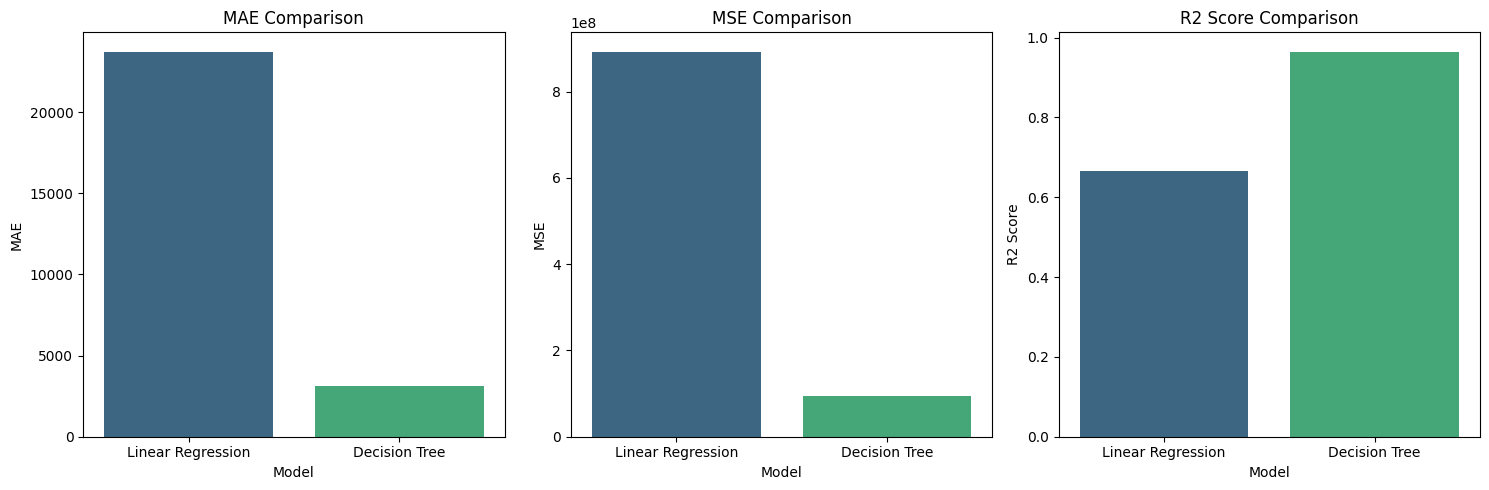

Model performance comparison plots generated successfully.


In [123]:
metrics = ['MAE', 'MSE', 'R2 Score']

plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model')

plt.tight_layout()
plt.show()

print("Model performance comparison plots generated successfully.")

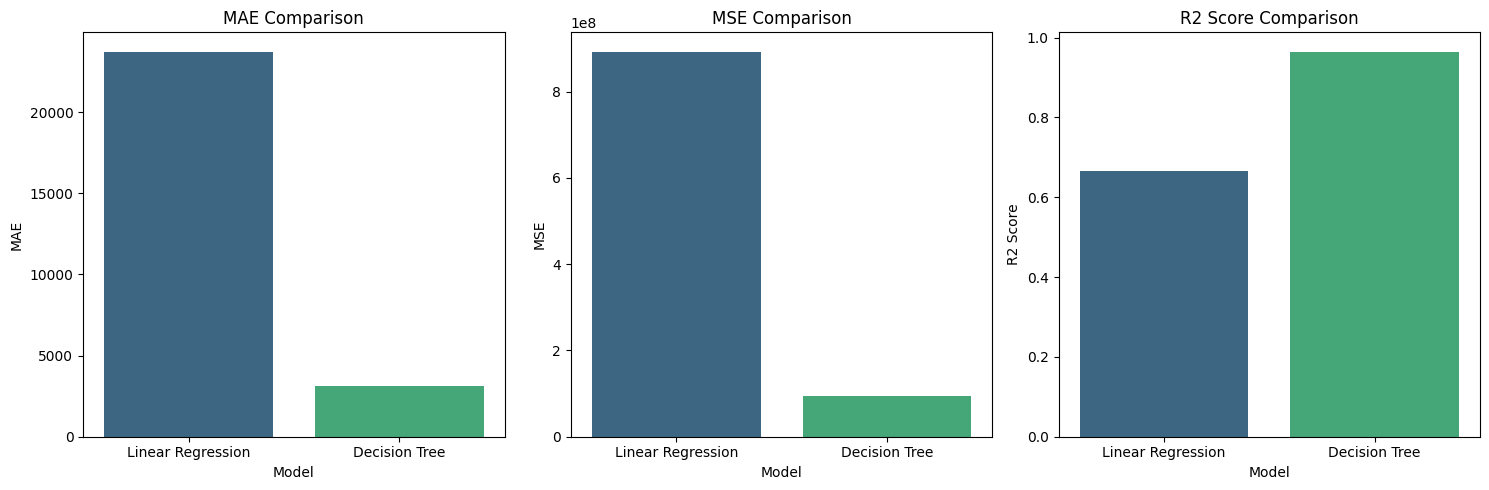

In [124]:
metrics = ['MAE', 'MSE', 'R2 Score']

plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='Model', y=metric, data=metrics_df, hue='Model', palette='viridis', legend=False)
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model')

plt.tight_layout()
plt.show()

In [125]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
y_pred_gbr = gbr_model.predict(X_test)

In [126]:
metrics_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Lasso', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_gbr)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_gbr)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_gbr)
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


               Model           MAE           MSE  R2 Score
0  Linear Regression  23736.652680  8.926684e+08  0.665754
1      Decision Tree   3116.941385  9.381798e+07  0.964871
2              Lasso  23736.751033  8.926669e+08  0.665754
3  Gradient Boosting   9558.937501  1.739770e+08  0.934857


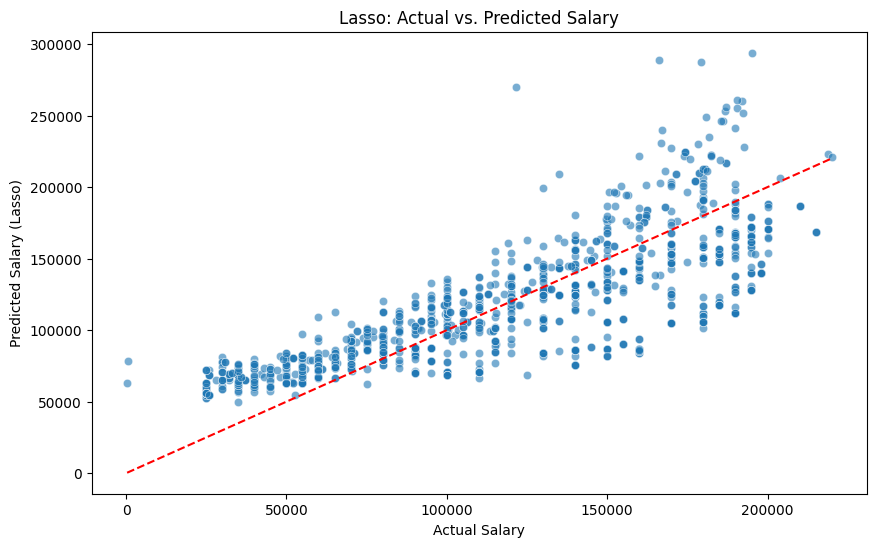

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (Lasso)')
plt.title('Lasso: Actual vs. Predicted Salary')
plt.show()

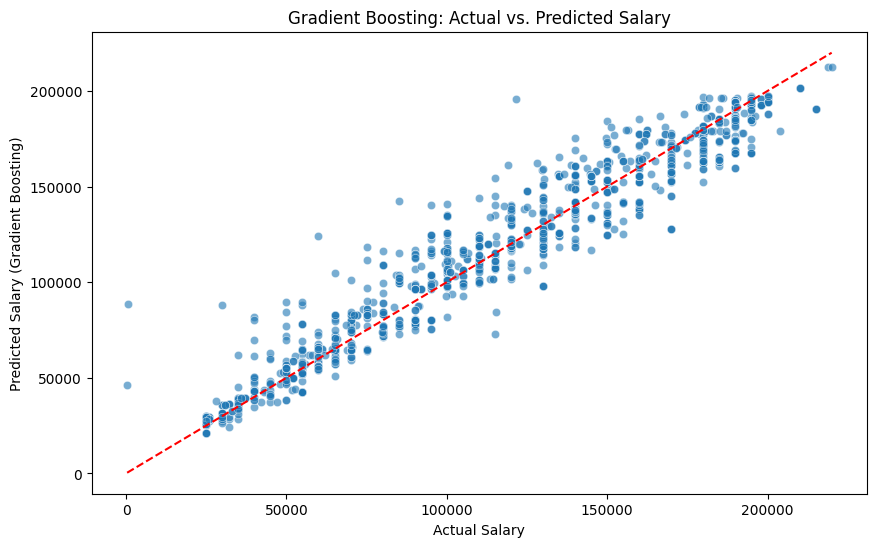

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (Gradient Boosting)')
plt.title('Gradient Boosting: Actual vs. Predicted Salary')
plt.show()

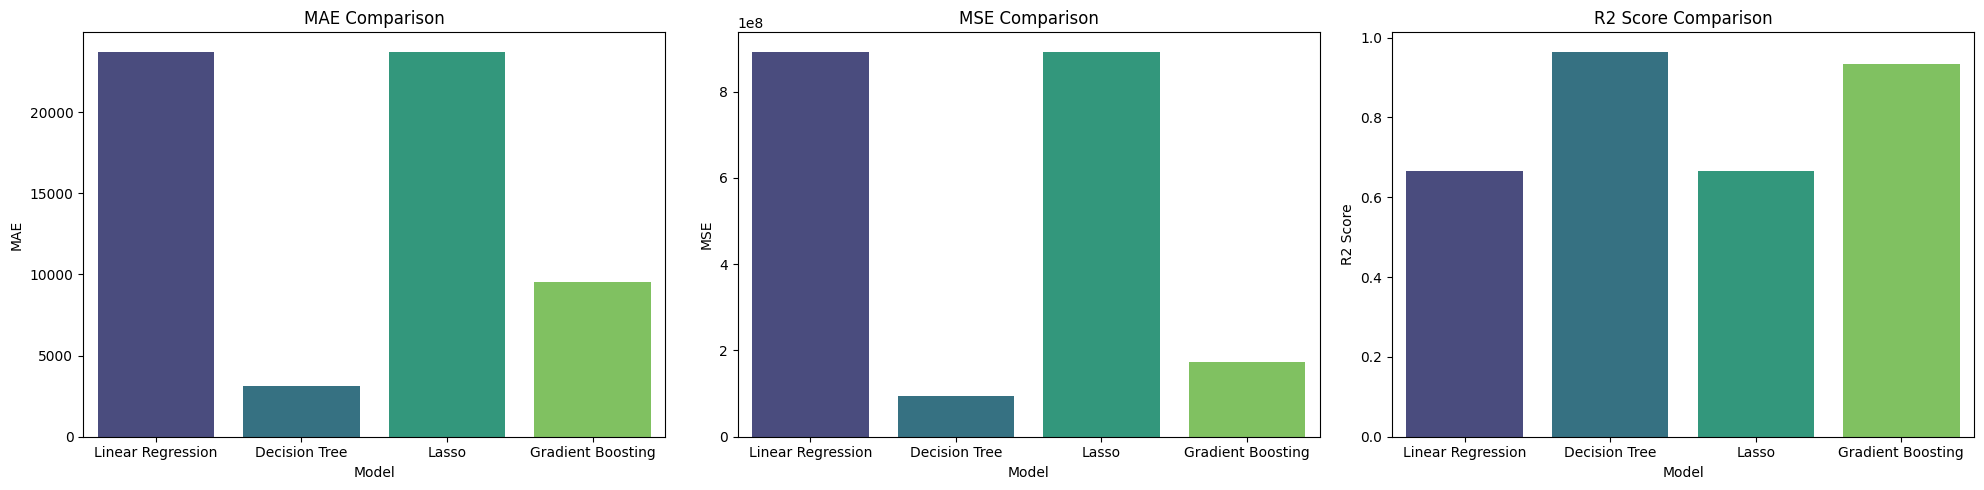

In [131]:
metrics = ['MAE', 'MSE', 'R2 Score']

plt.figure(figsize=(20, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='Model', y=metric, data=metrics_data, hue='Model', palette='viridis', legend=False)
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model')

plt.tight_layout()
plt.show()